# Manufacturing Defects <hr style="border:2.5px solid #126782"></hr>

<b>Gyro A. Madrona</b><br>
Data Analyst

In [529]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import (
    proportions_chisquare,
    proportions_ztest,
    proportion_effectsize)
from statsmodels.stats.power import TTestIndPower

# EDA

In [530]:
# load dataset
df = pd.read_csv(r"raw\defects-data.csv",
                 delimiter=',')
df

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64
...,...,...,...,...,...,...,...,...
995,996,25,Structural,3/1/2024,Component,Minor,Automated Testing,813.14
996,997,23,Functional,3/21/2024,Component,Moderate,Automated Testing,944.07
997,998,17,Structural,1/16/2024,Component,Minor,Automated Testing,401.12
998,999,96,Cosmetic,6/21/2024,Internal,Moderate,Manual Testing,775.63


In [531]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [532]:
# summary of statistics
df.describe()

,defect_id,product_id,repair_cost
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.837000,507.627150
std,288.819436,29.480935,289.623615
min,1.000000,1.000000,10.220000
25%,250.750000,26.000000,270.902500
50%,500.500000,51.000000,506.430000
75%,750.250000,77.000000,759.065000
max,1000.000000,100.000000,999.640000


## Categorical Data

In [533]:
# type or category of the defect
df['defect_type'].unique()

array(['Structural', 'Functional', 'Cosmetic'], dtype=object)

In [534]:
# location where the defect was found
df['defect_location'].unique()

array(['Component', 'Internal', 'Surface'], dtype=object)

In [535]:
# severity level of the defect
df['severity'].unique()

array(['Minor', 'Critical', 'Moderate'], dtype=object)

In [536]:
# method used to detect the defect
df['inspection_method'].unique()

array(['Visual Inspection', 'Automated Testing', 'Manual Testing'],
      dtype=object)

In [537]:
# checking for NAN values
df['repair_cost'].isna().sum()

np.int64(0)

## Count of Defects

In [538]:
plt.rcParams['font.family'] = 'Courier New' # runtime config

### Defect Type

In [539]:
# dataframe of defect type counts
n_dtype = (df['defect_type'].value_counts().reset_index()
           .sort_values(by='count',ascending=False))
n_dtype

,defect_type,count
0,Structural,352
1,Functional,339
2,Cosmetic,309


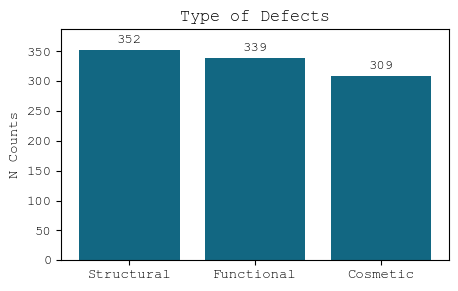

In [540]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(n_dtype['defect_type'],n_dtype['count'],
        color='#126782')
plt.title('Type of Defects')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars, labels=n_dtype['count'],
              padding=3)
plt.margins(y=0.1) # 10% margin
plt.show()

### Defect Location

In [541]:
# dataframe of defect location counts
n_dloc = (df['defect_location'].value_counts().reset_index()
          .sort_values(by='count',ascending=False))
n_dloc

,defect_location,count
0,Surface,353
1,Component,326
2,Internal,321


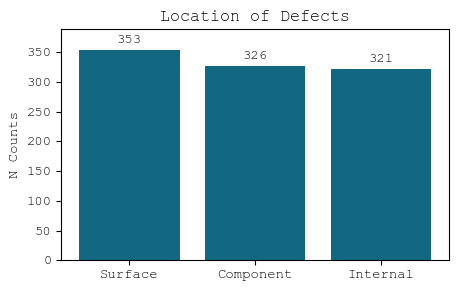

In [542]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(n_dloc['defect_location'],n_dloc['count'],
               color='#126782')
plt.title('Location of Defects')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars, labels=n_dloc['count'],
              padding=3)
plt.margins(y=0.1)
plt.show()

### Severity

In [543]:
# dataframe of defect severity
n_severity = (df['severity'].value_counts().reset_index()
              .sort_values(by='count',ascending=False))
n_severity

,severity,count
0,Minor,358
1,Critical,333
2,Moderate,309


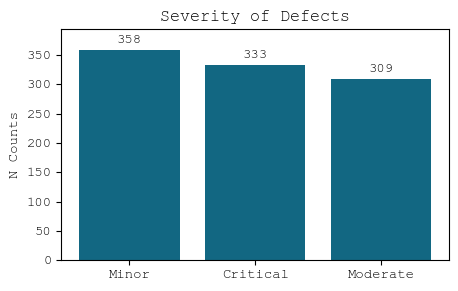

In [544]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(n_severity['severity'],n_severity['count'],
        color='#126782')
plt.title('Severity of Defects')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars,labels=n_severity['count']
              ,padding=3)
plt.margins(y=0.1)
plt.show()

### Inspection Method

In [545]:
# dataframe for inspection methods
n_inspection = (df['inspection_method'].value_counts().reset_index()
                .sort_values(by='count',ascending=False))
n_inspection

,inspection_method,count
0,Manual Testing,352
1,Visual Inspection,351
2,Automated Testing,297


In [546]:
# rename categories
n_inspection['inspection_method'] = n_inspection['inspection_method'].replace({
    'Manual Testing':'Manual',
    'Visual Inspection':'Visual',
    'Automated Testing':'Automated'
})
n_inspection

,inspection_method,count
0,Manual,352
1,Visual,351
2,Automated,297


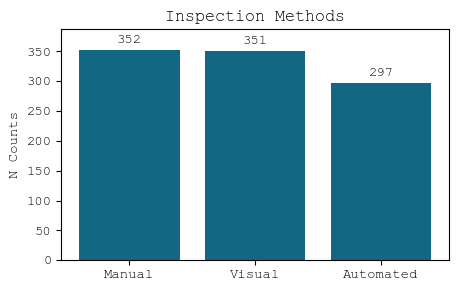

In [547]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(n_inspection['inspection_method'],n_inspection['count'],
               color='#126782')
plt.title('Inspection Methods')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars, labels=n_inspection['count'],
              padding=3)
plt.margins(y=0.1)
plt.show()

## Repair Cost

### Defect Type

In [548]:
# total repair cost by defect type
cost_dtype = (df.groupby('defect_type')['repair_cost'].sum().reset_index()
              .sort_values(by='repair_cost',ascending=False))
cost_dtype

,defect_type,repair_cost
2,Structural,176923.85
1,Functional,171905.58
0,Cosmetic,158797.72


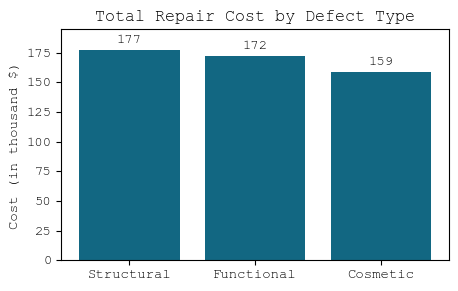

In [549]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(cost_dtype['defect_type'],cost_dtype['repair_cost']/1000,
        color='#126782')
plt.title('Total Repair Cost by Defect Type')
plt.ylabel('Cost (in thousand $)')

#bar label
plt.bar_label(bars, (cost_dtype['repair_cost']/1000).round().astype(int),
              padding=3)
plt.margins(y=0.1)
plt.show()

### Defect Location

In [550]:
# total repair cost by defect location
cost_loc = (df.groupby(by='defect_location')['repair_cost'].sum().reset_index()
            .sort_values(by='repair_cost',ascending=False))
cost_loc

,defect_location,repair_cost
0,Component,173697.56
2,Surface,172002.26
1,Internal,161927.33


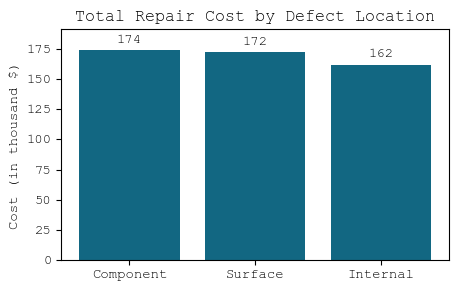

In [551]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(cost_loc['defect_location'],cost_loc['repair_cost']/1000,
        color='#126782')
plt.title('Total Repair Cost by Defect Location')
plt.ylabel('Cost (in thousand $)')

# bar label
plt.bar_label(bars, (cost_loc['repair_cost']/1000).round(0).astype(int),
              padding=3)
plt.margins(y=0.1)

plt.show()

### Severity

In [552]:
# total repair cost by severity
cost_severity = (df.groupby(by='severity')['repair_cost'].sum().reset_index()
                 .sort_values(by='repair_cost',ascending=False))
cost_severity

,severity,repair_cost
1,Minor,184166.97
0,Critical,168455.25
2,Moderate,155004.93


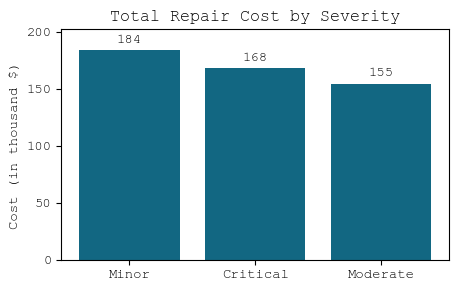

In [553]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(cost_severity['severity'],cost_severity['repair_cost']/1000,
        color='#126782')
plt.title('Total Repair Cost by Severity')
plt.ylabel('Cost (in thousand $)')

# bar label
plt.bar_label(bars,(cost_severity['repair_cost']/1000).round(0).astype(int),
              padding=3)
plt.margins(y=0.1)
plt.show()

### Inspection Method

In [554]:
cost_inspection = (df.groupby(by='inspection_method')['repair_cost'].sum().reset_index()
                   .sort_values(by='repair_cost',ascending=False))
cost_inspection

,inspection_method,repair_cost
1,Manual Testing,185178.29
2,Visual Inspection,173412.98
0,Automated Testing,149035.88


In [555]:
# rename categories
cost_inspection['inspection_method'] = cost_inspection['inspection_method'].replace({
    'Manual Testing':'Manual',
    'Visual Inspection':'Visual',
    'Automated Testing':'Automated'
})
cost_inspection

,inspection_method,repair_cost
1,Manual,185178.29
2,Visual,173412.98
0,Automated,149035.88


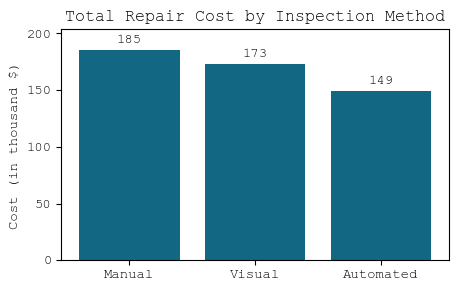

In [556]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(cost_inspection['inspection_method'],cost_inspection['repair_cost']/1000,
               color='#126782')
plt.title('Total Repair Cost by Inspection Method')
plt.ylabel('Cost (in thousand $)')

# bar label
plt.bar_label(bars,(cost_inspection['repair_cost']/1000).round(0).astype(int),
              padding=3)
plt.margins(y=0.1)
plt.show()

# Hypothesis Testing

## Count of Defects

### Defect Type

ANOM
<br>Ho: Structural = Functional = Cosmetic
<br>Ha: at least 1 is different

In [557]:
# count of defect type
sample_size = n_dtype['count'].sum()
n_structural = n_dtype[n_dtype['defect_type']=='Structural']['count'].values[0]
n_functional = n_dtype[n_dtype['defect_type']=='Functional']['count'].values[0]
n_cosmetic = n_dtype[n_dtype['defect_type']=='Cosmetic']['count'].values[0]

# ANOM
chi_stat, p_value, table = proportions_chisquare(
    count= [n_structural,n_functional,n_cosmetic],
    nobs=[sample_size]
)

In [558]:
# probability value
p_value

np.float64(0.11208474970957376)

In [559]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("at least 1 of the defect types is different.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between the defect types.")

There is no significant difference between the defect types.


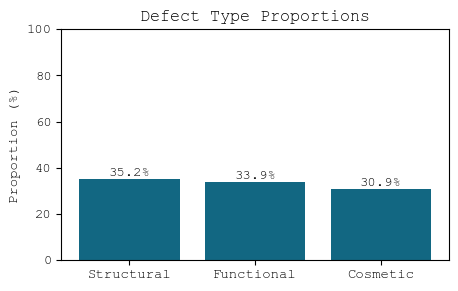

In [560]:
# proportion bar graph
p_structural = ((n_structural/sample_size)*100).round(1)
p_functional = ((n_functional/sample_size)*100).round(1)
p_cosmetic = ((n_cosmetic/sample_size)*100).round(1)

plt.figure(figsize=(5,3))
bars = plt.bar(n_dtype['defect_type'],[p_structural,p_functional,p_cosmetic],
               color='#126782')
plt.title('Defect Type Proportions')
plt.ylabel('Proportion (%)')
plt.ylim([0,100])

# bar label
plt.bar_label(bars,[f'{p}%' for p in [p_structural,p_functional,p_cosmetic]])
plt.show()

### Defect Location

ANOM
<br>Ho: Surface = Component = Internal
<br>Ha: at least 1 is different

In [561]:
# count of defect location
n_surface = n_dloc[n_dloc['defect_location']=='Surface']['count'].values[0]
n_component = n_dloc[n_dloc['defect_location']=='Component']['count'].values[0]
n_internal = n_dloc[n_dloc['defect_location']=='Internal']['count'].values[0]

# ANOM
chi_stat, p_value, table = proportions_chisquare(
    count= [n_surface,n_component,n_internal],
    nobs=[sample_size]
)

In [562]:
# probability value
p_value

np.float64(0.2635532089202421)

In [563]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("at least 1 of the defect locations is different.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between the defect locations.")

There is no significant difference between the defect locations.


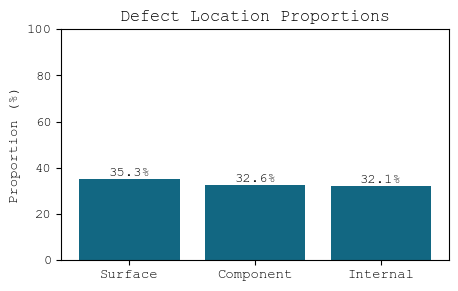

In [564]:
# proportion bar graph
p_surface = ((n_surface/sample_size)*100).round(1)
p_component = ((n_component/sample_size)*100).round(1)
p_internal = ((n_internal/sample_size)*100).round(1)

plt.figure(figsize=(5,3))
bars = plt.bar(n_dloc['defect_location'],[p_surface,p_component,p_internal],
               color='#126782')
plt.title('Defect Location Proportions')
plt.ylabel('Proportion (%)')
plt.ylim([0,100])

# bar label
plt.bar_label(bars,[f'{p}%' for p in [p_surface,p_component,p_internal]])
plt.show()

### Severity

ANOM
<br>Ho: Minor = Critical = Moderate
<br>Ha: at least 1 is different

In [565]:
# count of defect type
n_minor = n_severity[n_severity['severity']=='Minor']['count'].values[0]
n_critical = n_severity[n_severity['severity']=='Critical']['count'].values[0]
n_moderate = n_severity[n_severity['severity']=='Moderate']['count'].values[0]

# ANOM
chi_stat, p_value, table = proportions_chisquare(
    count= [n_minor,n_critical,n_moderate],
    nobs=[sample_size]
)

In [566]:
# probability value
p_value

np.float64(0.06710478003905303)

In [567]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("at least 1 of the defect severities is different.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between the defect severities.")

There is no significant difference between the defect severities.


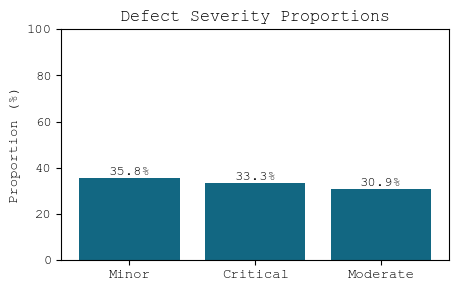

In [568]:
# proportion bar graph
p_minor = ((n_minor/sample_size)*100).round(1)
p_critical = ((n_critical/sample_size)*100).round(1)
p_moderate = ((n_moderate/sample_size)*100).round(1)

plt.figure(figsize=(5,3))
bars = plt.bar(n_severity['severity'],[p_minor,p_critical,p_moderate],
               color='#126782')
plt.title('Defect Severity Proportions')
plt.ylabel('Proportion (%)')
plt.ylim([0,100])

# bar label
plt.bar_label(bars,[f'{p}%' for p in [p_minor,p_critical,p_moderate]])
plt.show()

### Inspection Method

ANOM
<br>Ho: Manual = Visual = Automated
<br>Ha: at least 1 is different

In [569]:
# count of defect type
n_manual = n_inspection[n_inspection['inspection_method']=='Manual']['count'].values[0]
n_visual = n_inspection[n_inspection['inspection_method']=='Visual']['count'].values[0]
n_auto = n_inspection[n_inspection['inspection_method']=='Automated']['count'].values[0]

# ANOM
chi_stat, p_value, table = proportions_chisquare(
    count= [n_manual,n_visual,n_auto],
    nobs=[sample_size]
)

In [570]:
# probability value
p_value

np.float64(0.011602902461144883)

In [571]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("at least 1 of the inspection methods is different.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between inspection methods.")

at least 1 of the inspection methods is different.


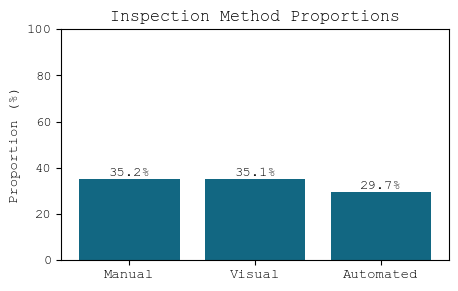

In [572]:
# proportion bar graph
p_manual = ((n_manual/sample_size)*100).round(1)
p_visual = ((n_visual/sample_size)*100).round(1)
p_auto = ((n_auto/sample_size)*100).round(1)

plt.figure(figsize=(5,3))
bars = plt.bar(n_inspection['inspection_method'],[p_manual,p_visual,p_auto],
               color='#126782')
plt.title('Inspection Method Proportions')
plt.ylabel('Proportion (%)')
plt.ylim([0,100])

# bar label
plt.bar_label(bars,[f'{p}%' for p in [p_manual,p_visual,p_auto]])
plt.show()

2 Proportion Test
<br>Hypothesis: Automated inspection has lower defect rate
<br>Ho: auto >= manual
<br>Ha: auto < manual

In [573]:
# left-tailed test
z_stat, p_value = proportions_ztest(
    count=[n_auto,n_manual],
    nobs=[sample_size],
    alternative='smaller'
)

In [574]:
# probability value
p_value

np.float64(0.004309548563345003)

In [575]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Automated inspection method has lower defect rate compared to manual inspection.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between automated and manual inspection method.")

Automated inspection method has lower defect rate compared to manual inspection.


Power

In [576]:
# power of the test
p_auto = n_auto/sample_size
p_manual = n_manual/sample_size
coheen_h = abs(proportion_effectsize(p_auto,p_manual))

power = TTestIndPower().solve_power(
    effect_size = coheen_h,
    nobs1 = n_auto,
    ratio = 1,
    alpha = 0.05
)
print("Power of the test: " +  str((power*100).round(2)) + "%")

Power of the test: 29.86%


Recommended Sample Size

In [577]:
# 80% power
sample_80p = TTestIndPower().solve_power(
    effect_size = coheen_h,
    power = 0.8,
    ratio = 1,
    alpha = 0.05
)
print("Recommended sample size: " + str(np.round(sample_80p).astype(int)))

Recommended sample size: 1137
